In [1]:
from __future__ import print_function, division
from collections import Counter
import os
import time
import json
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")

src = "data"

In [ ]:
t0 = time.clock()
info = pd.read_csv(os.path.join(src, "format1", "user_info_format1.csv"))
print('load user info\nruntime:', time.clock() - t0)

t0 = time.clock()
info.gender[pd.isnull(info.gender)] = 2  # if the a user's gender column was null = 2, see also doc
info.age_range[pd.isnull(info.age_range)] = 0  # if the a user's age_range column was null = 0, see also doc
info.age_range[info.age_range == 8] = 7  # age_range 8 was equal to the 7, see also doc
print("nclean null space of gender & age, set age 8 to 7\nruntime:", time.clock() - t0)

t0 = time.clock()
df = pd.read_csv(os.path.join(src, "format1", "user_log_format1.csv"))
print('\nload user log\nruntime:', time.clock() - t0)

t0 = time.clock()
crosstab_by_user_item_action = pd.crosstab([df.user_id, df.item_id], df.action_type)
print('\ncreate cross table\nruntime:', time.clock() - t0)

load user info
runtime: 0.351544094401
nclean null space of gender & age, set age 8 to 7
runtime: 0.162212289526


C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



load user log
runtime: 62.6422738734


In [ ]:
t0 = time.clock()
# merge the user infomation to the user log
data = pd.merge(df, info, how='left', on='user_id')
print("runtime:", time.clock() - t0)
# # slice 100,000 data to explore
# crosstab_slice = crosstab_by_user_item_action.iloc[:100000, :]
# # merge the user infomation to the cross table (user, item x action)
# data_slice = pd.merge(crosstab_slice.reset_index(), info, how='left', on=['user_id'])

0.0    285638
1.0    121670
2.0     16862
Name: gender, dtype: int64
number of users' infomation: 424170
number of users' gebder    : 424170


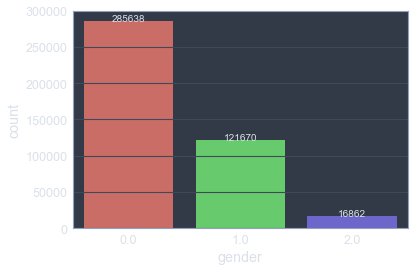

In [4]:
# Gender of user
info_gender = info['gender'].value_counts()
print(info_gender)
print("number of users' infomation:", info.shape[0])
print("number of users' gebder    :", info_gender.sum())
fig = plt.figure()
sns.countplot(x='gender', data=info, palette='hls')
for i in info_gender.index:
    plt.text(i, info_gender[i], info_gender[i], ha='center')
    
plt.show()
fig.savefig('image/gender.png')

3.0    111654
0.0     95131
4.0     79991
2.0     52871
5.0     40777
6.0     35464
7.0      8258
1.0        24
Name: age_range, dtype: int64
number of users' infomation: 424170
number of users' age range : 424170


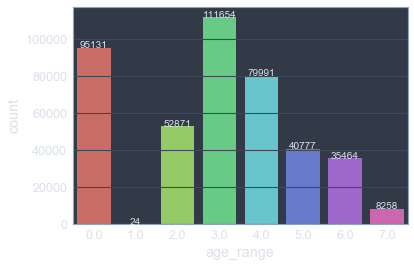

In [5]:
# Age Range of user
info_age_range = info['age_range'].value_counts()
print(info_age_range)
print("number of users' infomation:", info.shape[0])
print("number of users' age range :", info_age_range.sum())
fig = plt.figure()
sns.countplot(x='age_range', data=info, palette='hls')
for i in info_age_range.index:
    plt.text(i, info_age_range[i], info_age_range[i], ha='center')
plt.show()
fig.savefig('image/age_range.png')

In [ ]:
### print("total:", info.shape[0])
print("age available:", info['age_range'].value_counts().sum())
print("raw value count:\n", info['age_range'].value_counts())

# print(sum(info['age_range'].value_counts()))
info.age_range[pd.isnull(info.age_range)] = -1
info.age_range[info.age_range==8] = 7
print("age available:", info['age_range'].value_counts().sum())
print("clean value count:\n", info['age_range'].value_counts())
# info['age_range'].value_counts()

Text(0,0.5,'Frequency')

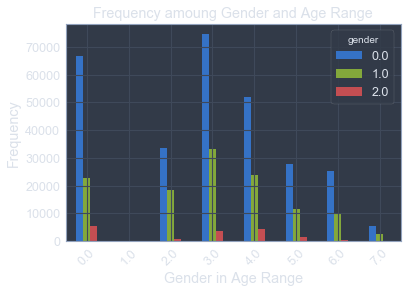

In [6]:
# Frequency amoung Gender and Age Range
pd.crosstab(info.age_range, info.gender).plot(kind='bar')
plt.title('Frequency amoung Gender and Age Range')
plt.xticks(rotation=45)
plt.xlabel('Gender in Age Range')
plt.ylabel('Frequency')

gender,0.0,1.0,2.0
action_type,,,
0,35547307,10814066,2189340
1,47719,23743,5288
2,2329907,811342,150895
3,2388245,486379,131099


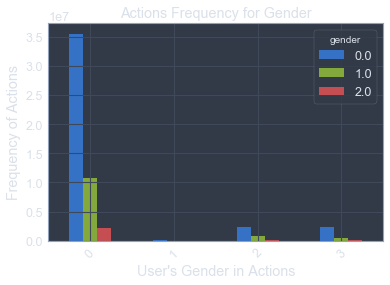

In [7]:
# Frequency of Actions to Gender
pd.crosstab(data.action_type, data.gender).plot(kind='bar')
plt.title('Actions Frequency for Gender')
plt.xticks(rotation=45)
plt.xlabel("User's Gender in Actions")
plt.ylabel('Frequency of Actions')
pd.crosstab(data.action_type, data.gender)

age_range,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
action_type,,,,,,,,
0,8919409,1512,4694010,13079874,10411758,5509918,4843730,1090502
1,24828,2,7230,18084,12386,6695,6279,1246
2,592622,96,295262,865659,769541,396683,308718,63563
3,522526,111,388518,885020,608367,286704,254989,59488


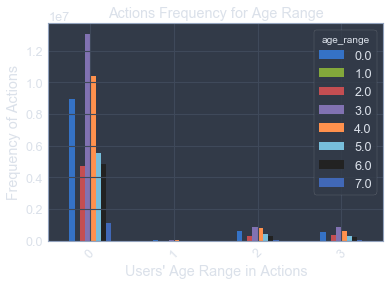

In [8]:
# Frequency of Actions to age
pd.crosstab(data.action_type, data.age_range).plot(kind='bar')
plt.title('Actions Frequency for Age Range')
plt.xticks(rotation=45)
plt.xlabel("Users' Age Range in Actions")
plt.ylabel('Frequency of Actions')
pd.crosstab(data.action_type, data.age_range)

In [29]:
# crosstab_by_user_item_action[2]=np.where(crosstab_by_user_item_action[2] > 0, 1, crosstab_by_user_item_action[2])
pd.crosstab(crosstab_by_user_item_action[0], crosstab_by_user_item_action[2]>0).shape


(674, 2)

In [87]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
x = []
y = []
for d in data:
    x += [[d[0], d[1], d[3]]]
    y += [[1 if d[2]>0 else 0]]

lr.fit(x, y)
print(lr.coef_)
print(lr.intercept_)

[[ 0.41630516 -1.28066333 -0.12869946]]
[-2.86266305]


C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[144,   0,   1],
       [111,   0,   0],
       [215,   0,   0],
       [173,   0,   0],
       [173,   0,   0]])

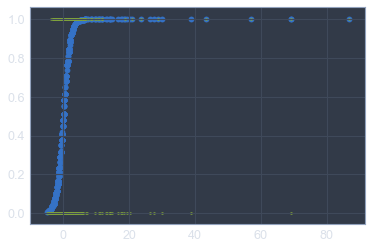

In [100]:
nx = np.array(x)
ny = np.array(y)

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

nx_1 = np.concatenate((np.ones((nx.shape[0], 1)), nx), axis=1)
w = np.array([lr.intercept_[0]] + [wi for wi in lr.coef_[0]])

t = nx_1.dot(w)
p = sigmoid(t)

plt.scatter(t, p)
plt.scatter(t, ny, s=6)
# plt.axis([-10, 10, -.1, 1.1])
np.where(t>40)
nx[np.where(t>40)]

roc_auc_score:  0.5446580323779875
roc_auc_score:  0.5446580323779875


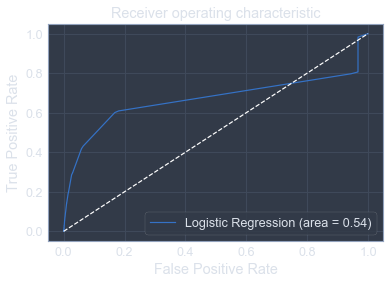

In [90]:
y_hat = lr.predict(nx)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
print("roc_auc_score: ", roc_auc_score(ny, y_hat))
print("roc_auc_score: ", roc_auc_score(ny, lr.predict(nx)))

pred_prob = sigmoid(t) 

# fpr0, tpr0, thresholds0 = roc_curve(ny, pred_prob)
fpr1, tpr1, thresholds1 = roc_curve(ny, lr.predict_proba(nx)[:,1])

def roc_graph(fpr=fpr1, tpr=tpr1):
#     fig = plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_score(y, y_hat))
    plt.plot([0, 1], [0, 1],'w--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
#     plt.savefig('Log_ROC')
    plt.show()
#     return fig

roc_graph()

In [2]:
import pandas as pd
df = pd.read_csv("data/format1/train_format1.csv")

In [3]:
df.head()

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [4]:
df['label'].value_counts()

0    244912
1     15952
Name: label, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54925330 entries, 0 to 54925329
Data columns (total 7 columns):
user_id        int64
item_id        int64
cat_id         int64
seller_id      int64
brand_id       float64
time_stamp     int64
action_type    int64
dtypes: float64(1), int64(6)
memory usage: 2.9 GB


In [12]:
df.drop_duplicates(["cat_id"]).shape

(1658, 7)

In [14]:
df["cat_id"].value_counts().shape

(1658L,)

In [16]:
t0 = time.clock()
cross_user_seller_act = pd.crosstab([df.user_id, df.seller_id], df.action_type)
print("runtime:", time.clock() - t0)

runtime: 204.740086176


In [18]:
cross_user_seller_act.shape

(14058666, 4)

In [21]:
df.drop_duplicates('seller_id').shape

(4995, 7)

SyntaxError: invalid syntax (<ipython-input-31-948de3403797>, line 1)

In [26]:
data_new = pd.merge(cross_user_seller_act.reset_index(), info, how='left', on='user_id')

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

x = data_new.iloc[:, [2, 3, 5, 6, 7]]
y = data_new[2]
y[y>0] = 1

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [33]:
data_new[2].value_counts()

0    11849233
1     2209433
Name: 2, dtype: int64

In [34]:
t0 = time.clock()
lr.fit(x, y)
print("runtime:", time.clock() - t0)

runtime: 52.1664060404


In [35]:
w = [lr.intercept_[0]] + [i for i in lr.coef_[0]]
w

[-2.1556812946673825,
 0.11471372236215145,
 0.21460566650925417,
 -0.14476193652087735,
 0.007771349968959871,
 0.10913868450474769]

In [42]:
prob = lr.predict_proba(x)[:, 1]
prob

array([0.12914779, 0.12914779, 0.15721635, ..., 0.28917271, 0.66964651,
       0.12654829])

In [39]:
lr.predict(x)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [45]:
data_new.age_range = data_new.age_range.apply(lambda x: x + 1)
data_new

,user_id,seller_id,0,1,2,3,age_range,gender
0,1,471,1,0,0,0,4.0,1.0
1,1,739,1,0,0,0,4.0,1.0
2,1,925,3,0,1,0,4.0,1.0
3,1,1019,10,0,1,0,4.0,1.0
4,1,1156,1,0,0,0,4.0,1.0
5,1,2245,5,0,0,0,4.0,1.0
6,1,4026,4,0,1,0,4.0,1.0
7,1,4177,1,0,0,0,4.0,1.0
8,1,4335,1,0,0,0,4.0,1.0
9,2,420,23,0,1,0,4.0,0.0
